<sub>Mario Stanke, University of Greifswald, Germany</sub>
# A Simple Regression Neural Network
<sup>(Monday afternoon)</sup>

This notebook gives the first example of a neural network. To keep it simple we estimate data simulated from a univariate function.

## Generate an Artificial Dataset

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

tf.keras.backend.set_floatx('float64') # floating point precision 64 bits

In [2]:
def f(x):
    '''A simple one-dimensional function with a few extrema'''
    return np.sin(15 * x) + 9 * x - 9 * x**2

#### Simulate $(x, y)$ pairs as artificial data set

In [3]:
np.random.seed(1)
m = 100 # number of data points (examples)
x = np.linspace(0, 1, m) # equidistant in [0,1] (both boundaries included)
y_theoretical = f(x)     # the points on the curve 
sigma = 0.1
y = y_theoretical + sigma * np.random.randn(m) # observations have noise (normal with mean 0 and variance 0.01)

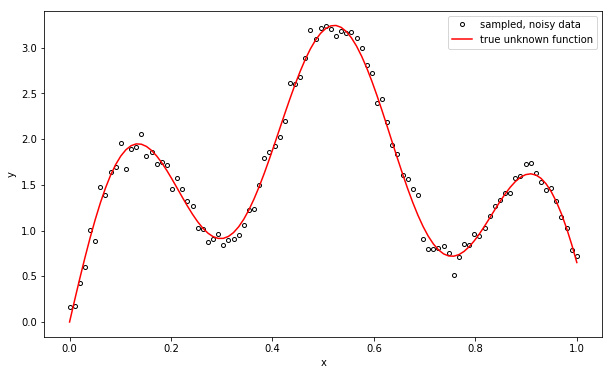

In [4]:
def plot_curve():
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.plot(x, y, 'ko', fillstyle = 'none', markersize = 4, label = "sampled, noisy data") # ko: blac(k) circle
    ax.plot(x, y_theoretical, 'r', label = "true unknown function")
    plt.xlabel("x")
    plt.ylabel("y")
    return ax

ax = plot_curve()
ax.legend();

## Create Neural Network Model  
We will use [```tf.keras```](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras), a high-level approach to neural network design and learning. The NN shall have 2 hidden layers with 8 neurons each. As activation functions we chose the logistic sigmoid function $\sigma$.

<img src="nn8-8.png" alt="network architecture" width="500"/>

In [5]:
np.random.seed(2) # so we all get the same pseudorandom results

# a neural network is a stack of layers, in keras called "Sequential" model
model = tf.keras.models.Sequential() # so far the stack is empty, 0 layers

# add neural network layers one by one
# Dense is a fully connected layer, parametrized by a matrix of shape (input_units, output_units).
# The first number given in Dense is the number of output units, the number of input units is implicit.
# By default use_bias=True which adds output_units parameters for each layer
model.add(Dense(8, activation = tf.nn.sigmoid, input_dim = 1)) # input dimension only required for first layer
model.add(Dense(8, activation = tf.nn.sigmoid))
model.add(Dense(1))

model.summary()     # summarizes layers and parameters
model.get_weights() # a look under the 'hood' for teaching purposes

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.26890505, -0.09033369, -0.24509861, -0.81412018,  0.50025085,
          0.05393749, -0.60376654, -0.76406754]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[-0.18248778, -0.32271163,  0.22431385, -0.5912774 ,  0.07921315,
          0.07119838, -0.12688427,  0.23532308],
        [ 0.60572147, -0.04200566,  0.00497282,  0.17785505, -0.28110928,
          0.43429273,  0.57206058, -0.60052761],
        [ 0.44777185, -0.40716379,  0.28578973, -0.28000571,  0.33548978,
          0.42991783,  0.54393711,  0.42977944],
        [ 0.47389041,  0.03408742,  0.0329204 , -0.54533554, -0.51311958,
          0.58325884, -0.22420839,  0.15195895],
        [ 0.44328151,  0.50852957,  0.45348373,  0.18374275,  0.56029433,
          0.31772847, -0.57406956,  0.41300572],
        [ 0.14241393, -0.59068502,  0.4841944 , -0.20804011,  0.39004143,
          0.11258401,  0.22873424,  0.41601523],
        [ 0.29246483,  0.2507194 , -0.04439081,  0.39671701,  0.27161837,
         -0.23427706,

The weights are randomly initializated. This is important (why?) as can be the parameters of the distribution. We postpone parameter initialization to the next notebook.

### Compile the model

In [6]:
# define the loss, optimization algorithm and prepare the model for gradient computation 
opti = tf.keras.optimizers.Adam(learning_rate = 0.05) # Adam is a popular method for stochastic gradient descent
model.compile(optimizer = opti, loss = 'mse') # mean squared error

### Train the parameters (learning)

In [7]:
# execute the actual training 
history = model.fit(x, y, epochs=3000, verbose=0) # takes ~20s
# verbose = 1,2 gives more output

### Examine the learning progress

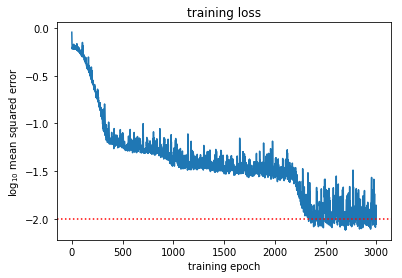

In [8]:
plt.plot(np.log10(history.history["loss"])); # one mse value per epoch
plt.title("training loss")
plt.xlabel("training epoch")
plt.ylabel(r"$\log_{10}$ mean squared error");
plt.axhline(y = np.log10(sigma**2), color = "red", linestyle = ":");

Observe that with our choice for the measurement noise the theoretical optimum for the mean squared error *on new data* is $10^{-2}$ (red dotted line).
### Use the model for predictions

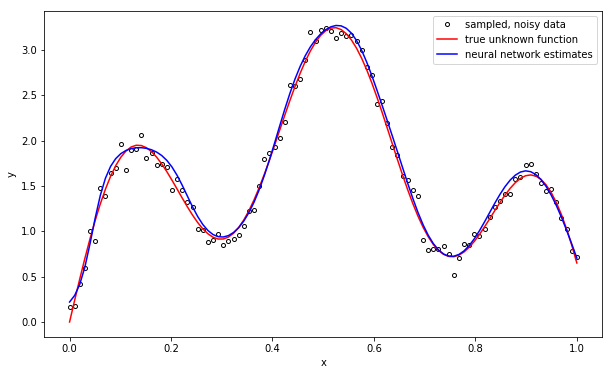

In [9]:
x_input = x.reshape((-1, 1)) # make x a matrix (with 1 column) as expected by predict
y_pred = model.predict(x_input)

ax = plot_curve()
ax.plot(x, y_pred, 'b', label = "neural network estimates") # (b)lue
ax.legend();